## **AUTORES**

Jarby Daniel Salazar

Alexander Mosquera Perdomo

## **1. Selección del método**

Se utilizarán técnicas de Machine Learning para entrenar y evaluar diferentes modelos de clasificación con el fin de explorar alternativas que permitan predecir la presencia de enfermedades cardiovasculares en un paciente dada una serie de datos correspondientes a distintas caracteristicas que se verán mas adelante.

## **2. Selección del dataset**

El dataset seleccionado fue creado por la combinacion de diferentes datasets disponibles pero independientes entre sí. En este dataset se han combinado 5 datasets que compartian 11 varaiables en común lo que lo hace el dataset más grande hasta ahora con acceso público y con propositos de investigación. La fuente del dataset se encuentra [aquí](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

Los cinco datasets originales anteriormente mencionados corresponden a diferentes localizaciones y poseen diferentes cantidades de registros. Las fuentes son:

- Hungarian Institute of Cardiology.Budapest: Andras Janosi, M.D.

- University Hospital, Zurich,Switzerland: William Steinbrunn, M.D.

- University Hospital, Basel,Switzerland: Matthias Pfisterer, M.D.

- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Estos datasets independientes pueden encontrarse [aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

### **2.1 Información de los atributos**

1. Age: Edad del paciente [Años]
2. Sex: Sexo del paciente [M: Masculinos, F: Femenino]
3. ChestainType: Tipo del dolor de pecho [TA: Típica angina, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomático]
4. RestingBP: Presión arterial en reposo [mm Hg]
5. Cholsterol: Suero Colesterico [mm/dl]
6. FastingBS: Glucemia en ayunas [1: Si FastingBS > 120 mg/dl, 0: otro]
7. RestingECG: resultados del electrocardiograma en reposo [Normal: Normal, ST: Anormalidad ST-T, LVH: Muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estres]
8. MaxHR: Frecuencia cardíaca máxima alcanzada [Valor numerico entre 60 y 202]
9. ExerciseAngina: Angina inducida por el ejercicio [Y: Si, N: No]
10. Oldpeak: ST [Valor numerico medido en depresión]
11. ST_Slope: La pendiente del segmento ST de ejercicio pico [Up: Positiva, Flat: Plana , Down: Negativa]
12. HeartDisease: Clase [1: Enfermedad del corazón, 0: Normal]

## **3. Análisis preliminar de los datos**

Para el análisis del dataset el primer paso es importar todas las librerías que se van a necesitar en el desarrollo del notbeook:



In [ ]:
!pip install plotly==5.3.1 #Ya que se hace uso de la libreria Plotly debe instalarse la última versión

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Métodos necesarios
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#Modelos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Se crea el dataframe a partir del dataset y se observan algunos datos y las columnas

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Ahora obtenemos las dimensiones del dataframe para conocer su tamaño, primordialmente el número de registros.

In [ ]:
df.shape

(918, 12)

El total de registro es 918. Ahora observemos si hay valores nulos en el dataset en alguna de sus columnas.

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Debido a que no se encuentras datos perdidos, se procede a realizar la visualización de datos

### **3.1. Visualización de datos**

La primera gráfica permitirá observar la cantidad de usuarios del dataset que son hombres y mujeres y cuantos estan enfermos.

In [ ]:
fig=px.histogram(df,x='Sex',color='HeartDisease', title="Enfermedad por genero")
fig.show()

La gráfica permite observar que la mayoría de registros en el dataset corresponden a pacientes masculinos sobrepasando los 700. Por otro lado cerca de 200 datos corresponden a mujeres, esta diferencias de genero en los datos puede afectar directamente el análisis posterior que se realice de los datos ya que marca un contexto en la naturaleza del dataset. Algo destacable de este gráfico es que los hombres parecen ser mas afectados por las enfermedades del corazón que las mujeres ya que incluso son más los hombres enfermos que sanos en este dataset, sin embargo no se puede concluir esto apresuradamente ya que los hombres tienen la mayoría de datos y dicha conclusión podría verse sesgada. Tambien cabe mencionar que entre los datos de mujeres son mas las sanas que las enfermas, contrario a los hombres. Ahora se grafica la cantidad de datos del vector objetivo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



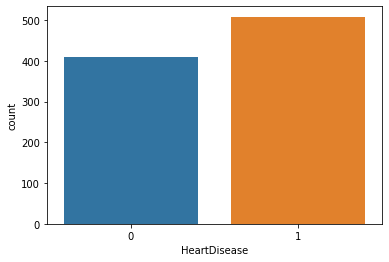

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot('HeartDisease', data = df)
plt.show()

Como se observa en el gráfico, el número de personas que poseen un enfermedad cardiovascular y de personas que no la poseen es cercano entre sí. Esto es algo a tener en cuenta ya que no parece existir un desbalanceo de los datos, por lo que resulta positivo para el análisis. Cabe mencionar que la categoría 1 representa la presencia de la enfermedad y 0 la ausencia. La siguiente gráfica permite observar la edad promedio de personas en el dataset y contrastarlo por genero.

In [ ]:
hist=px.histogram(df,x='Age',color='Sex', title="Edad Promedio")
hist.add_vline(x=df['Age'].mean(),line_dash="dash")
hist.show()

Se observa que la edad promedio de personas en el dataset es alrededor de 54 años y muy pocos de los registros corresponden a personas menores de 30 y mayores a 70, concentrando la mayor población entre este mismo rango. A continuación se indaga en la variable ChestPainType para observar su relación con la presencia de la enfermedad. Primero se toma del dataframe sólo los casos donde está presenta la enfermedad y se procede a graficar.

In [ ]:
df1=df[df['HeartDisease']==1] 
df1
fig=px.pie(df1,names='ChestPainType', title="Tipo de dolor del pecho en casos positivos")
fig.show()

De la anterior gráfica resulta evidente que el tipo de dolor en el pecho ASY (Asintomático) resulta ser el más peligroso, las personas que lo tienen son más propensos a tener una enfermedad del corazón. Las personas con dolor tipo TA (Típica Angina) son las menos propensas a sufrir de la enfermedad, pero aún posible de tenerla. En la siguiente gráfica se hace una comparación de los datos entre Oldpeak y HeartDisease para observar el comprotamiento del factor.

Text(0.5, 1.0, 'Oldpeak vs Heartdisease')

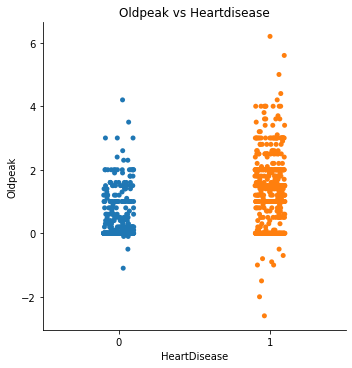

In [ ]:
sns.catplot(x="HeartDisease", y="Oldpeak", data=df)
plt.title("Oldpeak vs Heartdisease")

Se observan condensaciones de los datos similares en los casos positivos y negativos de las enfermedades del corazón. Se observa una mayor presencia de datos en los casos positivos, sin embargo esto es lógico ya que como se vió en una gráfica anteriormente analizada, el dataset posee ligeramente más de estos casos. Por lo tanto no se observa un patron evidente en alguno de los valores de Oldpeak que sugiera que la depresión sea un indicador importante que conduzca a enfermedades del corazón. 

## **4. Pre-procesamiento**
### **4.1 Normalización de datos de ChestPainTypeSe**

Se procede a eliminar abreviaturas para ChestPainType, ATA=Atypical Angina, TA=Typical Angina, NAP=Non-Anginal Pain, ASY=Asymptomatic

In [ ]:
def chest_pain_type(title):
    if title =='ATA':
        return 'Atypical Angina'
    elif title=='TA':
        return 'Typical Angina'
    elif title=='NAP':
        return 'Non-Anginal Pain'
    elif title=='ASY':
        return 'Asymptomatic'
    else:
        return 'N/A'
    
df['ChestPainType']=df['ChestPainType'].apply(chest_pain_type)

### **4.2 Formato de los datos**
#### **4.2.1 Columna Sex**
En la columna **Sex**, se muestra el género del paciente, este dato es necesario tenerlo en tipo númérico por lo que se procede a reemplazar a mujeres (F) con uno y a hombres (M) con el valor de cero:

In [ ]:
df["Sex"][df["Sex"] == "F"] = 1
df["Sex"][df["Sex"] == "M"] = 0
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,Atypical Angina,130,283,0,ST,98,N,0.0,Up,0
3,48,1,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0


#### **4.2.2 Columna ExerciseAngina**
De igual manera es necesario tener la columna **ExerciseAngina** de tipo numérico, por lo que se reemplaza No(N) con el valor de 0, y si(Y) con el valor de 1:

In [ ]:
df["ExerciseAngina"][df["ExerciseAngina"] == "Y"] = 1
df["ExerciseAngina"][df["ExerciseAngina"] == "N"] = 0
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,Atypical Angina,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,Non-Anginal Pain,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,Atypical Angina,130,283,0,ST,98,0,0.0,Up,0
3,48,1,Asymptomatic,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,Non-Anginal Pain,150,195,0,Normal,122,0,0.0,Up,0


#### **4.2.3 Columna ST_Slope**
Para la columna **ST_Slope** para convertirlo en tipo numérico, se reemplaza UP con el valor de 1, Flat con el valor de 2 y Down con el valor de 0:

In [ ]:
df["ST_Slope"][df["ST_Slope"] == "Up"] = 1
df["ST_Slope"][df["ST_Slope"] == "Flat"] = 2
df["ST_Slope"][df["ST_Slope"] == "Down"] = 0
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,Atypical Angina,140,289,0,Normal,172,0,0.0,1,0
1,49,1,Non-Anginal Pain,160,180,0,Normal,156,0,1.0,2,1
2,37,0,Atypical Angina,130,283,0,ST,98,0,0.0,1,0
3,48,1,Asymptomatic,138,214,0,Normal,108,1,1.5,2,1
4,54,0,Non-Anginal Pain,150,195,0,Normal,122,0,0.0,1,0


#### **4.2.4 Columna RestingECG**
Se procede realizar el mismo procedimiento para la columna **RestingECG** para convertirlo en tipo numérico, se reemplaza Normal con el valor de 0, ST con el valor de 1 y HVI con el valor de 2:

In [ ]:
df["RestingECG"][df["RestingECG"] == "Normal"] = 0
df["RestingECG"][df["RestingECG"] == "ST"] = 1
df["RestingECG"][df["RestingECG"] == "LVH"] = 2
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,Atypical Angina,140,289,0,0,172,0,0.0,1,0
1,49,1,Non-Anginal Pain,160,180,0,0,156,0,1.0,2,1
2,37,0,Atypical Angina,130,283,0,1,98,0,0.0,1,0
3,48,1,Asymptomatic,138,214,0,0,108,1,1.5,2,1
4,54,0,Non-Anginal Pain,150,195,0,0,122,0,0.0,1,0


#### **4.2.5 Columna ChestPainType**
Finalmente para la columna **ChestPainType** para convertirlo en tipo numérico, se reemplaza Atypical Angina con el valor de 1, Typical Angina con el valor de 2, Non-Anginal Pain con el valor de 3 y Asymptomatic con el valor de 0:

In [ ]:
df["ChestPainType"][df["ChestPainType"] == "Asymptomatic"] = 0
df["ChestPainType"][df["ChestPainType"] == "Atypical Angina"] = 1
df["ChestPainType"][df["ChestPainType"] == "Typical Angina"] = 2
df["ChestPainType"][df["ChestPainType"] == "Non-Anginal Pain"] = 3
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,1,0
1,49,1,3,160,180,0,0,156,0,1.0,2,1
2,37,0,1,130,283,0,1,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,2,1
4,54,0,3,150,195,0,0,122,0,0.0,1,0


## **5. Modelos, entrenamiento y evaluación**
Primero se procede a separar el dataset en dos conjuntos para testeo y entrenamiento.


In [ ]:
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

### **5.1 Algoritmo GaussianNB**
Se utiliza el algoritmo GaussianNB inicialmente para realizar un modelo, entrenarlo y evaluarlo con las métricas Accuracy, Precision, Recall, Specificity y F1-score. Además se grafica la matriz de confusión y se realizan algunos comentarios sobre los resultados observados.Se construye el modelo y se crean los datos para entrenamiento y evaluación, tomando un 70% de los datos para entrenamiento. Luego se entrena el modelo y se muestran los resultados del mismo.

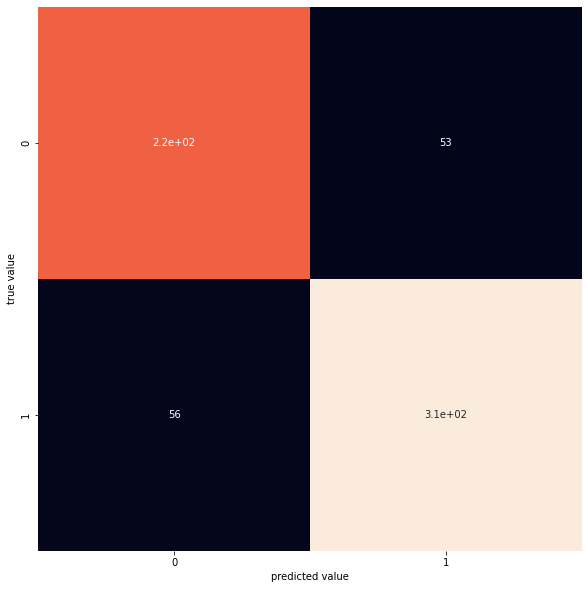

In [ ]:
model = GaussianNB()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.7) #dividir datos de entranamiento y evaluación
model.fit(Xtrain, ytrain) #entrenar modelo
y_model = model.predict(Xtest) #predicción

# matriz de confusión
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(ytest, y_model)
tn, fp, fn, tp = mat.ravel() #Se obtienen estos datos para calcular la métrica specificity
sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
#Obtener metricas

accuracy70_GaussianNB=accuracy_score(ytest, y_model)
print('ACCURACY:',accuracy70_GaussianNB)
precision70_GaussianNB=precision_score(ytest, y_model)
print('PRECISION:',precision70_GaussianNB)
recall70_GaussianNB=recall_score(ytest, y_model)
print('RECALL:',recall70_GaussianNB)
specificity70_GaussianNB = tn / (tn+fp) # tasa de verdaderos negativos
print('SPECIFICITY:',specificity70_GaussianNB)
f1_score70_GaussianNB=f1_score(ytest, y_model)
print('F1-SCORE:',f1_score70_GaussianNB)

ACCURACY: 0.8304821150855366
PRECISION: 0.8539944903581267
RECALL: 0.8469945355191257
SPECIFICITY: 0.8086642599277978
F1-SCORE: 0.8504801097393689


Se obtienen unos resultados aceptables para el modelo. La exactitud es de un 83% por lo que gran parte de los registros de evaluación se predicen correctamente. El recall de 84% es un buen indicador ya que permite conocer que tan alta es la fracción de verdaderos positivos en contraste con los falsos negativos, un alto recall significa que los falsos negativos son bajos y esto es lo que mas se busca en este contexto ya que sería muy peligroso diagnosticar a alguien que esta enfermo del corazón como alguien sano. La especificidad del 80% tambien es aceptable ya que se predicen bien en dicho rango las clases negativas del dataset y la precisión del 85% significa que la dispersión de los datos de predicción es baja. El f1-score del 85% se considera tambien aceptable ya que indica la calidad del modelo comparando el recall con la precisión, sin embargo en este contexto no es muy importante esta metrica ya que el dataset, como se vió anteriormente, no está desbalanceado. Las metricas mas importantes a considerar en esta sitaución son el recall y accuracy.

Se varia el porcentaje de entrenamiento a 80% para el mismo modelo y se observan nuevamente los resultados.

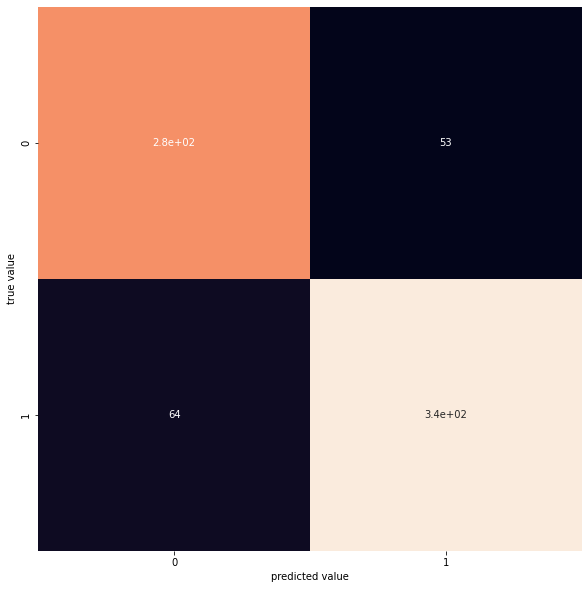

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.8) #dividir datos de entranamiento y evaluación
model.fit(Xtrain, ytrain) #entrenar modelo
y_model = model.predict(Xtest) #predicción

# matriz de confusión
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(ytest, y_model)
tn, fp, fn, tp = mat.ravel() #Se obtienen estos datos para calcular la métrica specificity
sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
#Obtener metricas

print('ACCURACY:',accuracy_score(ytest, y_model))
print('PRECISION:',precision_score(ytest, y_model))
print('RECALL:',recall_score(ytest, y_model))
specificity = tn / (tn+fp) # tasa de verdaderos negativos
print('SPECIFICITY:',specificity)
print('F1-SCORE:',f1_score(ytest, y_model))

ACCURACY: 0.8408163265306122
PRECISION: 0.8658227848101265
RECALL: 0.8423645320197044
SPECIFICITY: 0.8389057750759878
F1-SCORE: 0.8539325842696629


Se observa un incremento ligero en todas las metricas, por lo que aparentemente resulta positivo agregar mas datos de entrenamiento al modelo, sin embargo el dataset posee alrededor de 900 datos que en realidad no son muchos. Dejar un 20% de datos para la evaluación puede resultar contraproducente con tan pocos datos por lo que no se puede concluir apresuradamente que lo mas conveniente en esta situación sea destinar un 80% de los datos para entrenamiento, por lo tanto, a pesar de que se observa una mayor exactitud y recall en este modelo lo más conveniente permitir mas datos para la evaluación y así disminuir el sesgo.

### **5.2 Algoritmo DecisionTreeClassifier**
#### **5.2.1 Porcentaje 70% para datos de entrenamiento**
Se realiza el mismo procedimiento con el algoritmo DecisionTreeClassifier, se construye el modelo y se crean los datos para entrenamiento tomando un 70% de los datos y el restante para la evaluación, se entrena el modelo y se muestran los resultados, finalmente se grafica la matriz de confusión y se realizan algunos comentarios sobre los resultados observados.

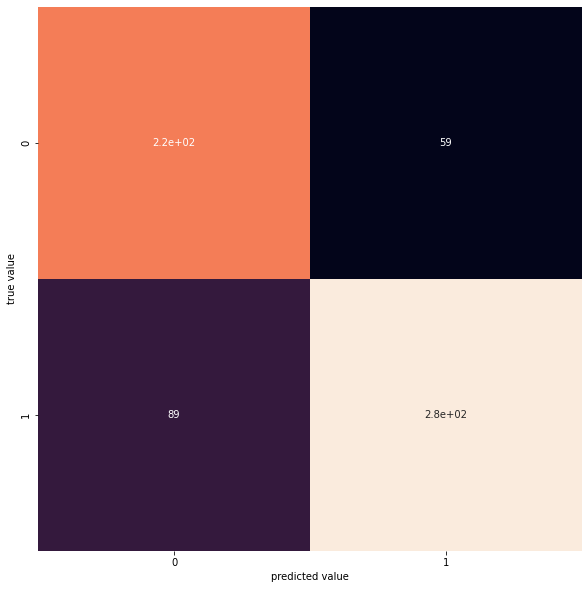

In [ ]:
model = DecisionTreeClassifier()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.7) #dividir datos de entranamiento y evaluación
model.fit(Xtrain, ytrain) #entrenar modelo
y_model = model.predict(Xtest) #predicción

# matriz de confusión
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(ytest, y_model)
tn, fp, fn, tp = mat.ravel() #Se obtienen estos datos para calcular la métrica specificity
sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('predicted value')
plt.ylabel('true value');

**Se obtienen las métricas:**
accuracy, precision, recall, specificity y f1-score

In [ ]:
accuracy70_DecisionTreeClassifier=accuracy_score(ytest, y_model)
print('ACCURACY:',accuracy70_DecisionTreeClassifier)
precision70_DecisionTreeClassifier=precision_score(ytest, y_model)
print('PRECISION:',precision70_DecisionTreeClassifier)
recall70_DecisionTreeClassifier=recall_score(ytest, y_model)
print('RECALL:',recall70_DecisionTreeClassifier)
specificity70_DecisionTreeClassifier = tn / (tn+fp) # tasa de verdaderos negativos
print('SPECIFICITY:',specificity70_DecisionTreeClassifier)
f1_score70_DecisionTreeClassifier=f1_score(ytest, y_model)
print('F1-SCORE:',f1_score70_DecisionTreeClassifier)

ACCURACY: 0.7698289269051322
PRECISION: 0.8244047619047619
RECALL: 0.7568306010928961
SPECIFICITY: 0.7870036101083032
F1-SCORE: 0.789173789173789


Los resultados de las métricas que se obtienen son poco favorables para el modelo. La exactitud es de alrededor de un 76% lo que no corresponde a un valor aceptable para la predicción de los registros de evaluación. De igual forma el recall arroja un resultado por debajo del valor aceptado, para este caso se obtiene un recall de alrededor de 77% el cual indica que los falsos negativos son más altos que en el modelo anterior, resultado poco conveniente ya que no se debe diagnosticar a alguien que está enfermo del corazón como alguien sano. La precisión es de alrededor de un 80%, significa que la dispersión de los datos de predicción es baja, con un valor apenas aceptable, en cuanto a la especificidad se obtiene un valor de alrededor de 74%, lo que  significa que las clases negativas que el algoritmo ha clasificado correctamente no llega a un valor aceptable, El resultado de f1-score es de alrededor de 78%, un valor que no llega a estar en un rango aceptable pero que no es crítico debido a que el dataset utilizado está balanceado.


#### **5.2.1 Porcentaje 80% para datos de entrenamiento**

Se realiza el mismo procedimiento, esta vez aumentando a un 80% de los datos, para usarlos como entrenamiento.

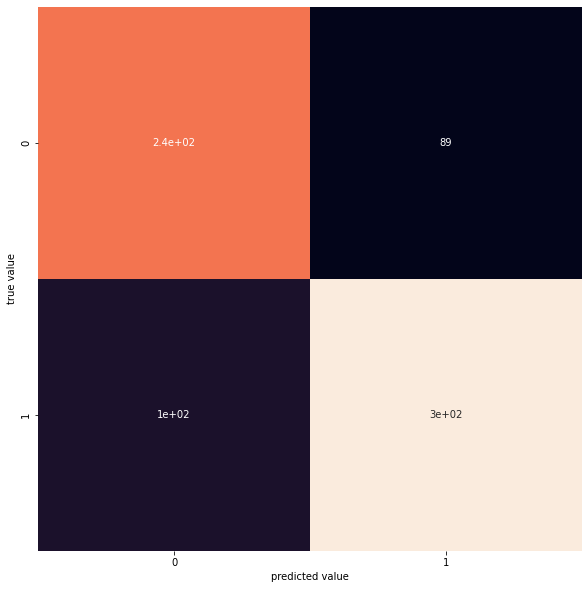

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.8) #dividir datos de entranamiento y evaluación
model.fit(Xtrain, ytrain) #entrenar modelo
y_model = model.predict(Xtest) #predicción

# matriz de confusión
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(ytest, y_model)
tn, fp, fn, tp = mat.ravel() #Se obtienen estos datos para calcular la métrica specificity
sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('predicted value')
plt.ylabel('true value');

**Se obtienen las métricas:**
accuracy, precision, recall, specificity y f1-score

In [ ]:
print('ACCURACY:',accuracy_score(ytest, y_model))
print('PRECISION:',precision_score(ytest, y_model))
print('RECALL:',recall_score(ytest, y_model))
specificity = tn / (tn+fp) # tasa de verdaderos negativos
print('SPECIFICITY:',specificity)
print('F1-SCORE:',f1_score(ytest, y_model))

ACCURACY: 0.7374149659863946
PRECISION: 0.7723785166240409
RECALL: 0.7438423645320197
SPECIFICITY: 0.729483282674772
F1-SCORE: 0.7578419071518193


Al aumentar el porcentaje de entrenamiento a 80%, se observa un notable decremento en el resultado de todas las métricas, por lo que para el modelo de DecisionTreeClassifier en este dataset, no conviene aumentar tanto el porcentaje de datos para el entrenamiento.

### **5.2 Algoritmo KNeighborsClassifier**
#### **5.2.1 Porcentaje 70% para datos de entrenamiento**

Finalmente se implementa el algoritmo KNeighborsClassifier, el modelo define los datos para entrenamiento tomando un 70% de estos, se entrena el modelo y se muestran los resultados, se grafica la matriz de confusión, finalmente se obtienen diferentes métricas y se realiza un análisis de los resultados.

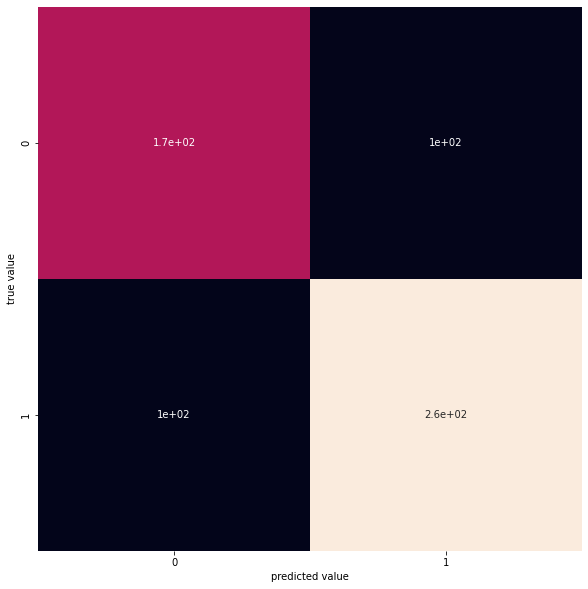

In [ ]:
model= KNeighborsClassifier()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.7) #dividir datos de entranamiento y evaluación
model.fit(Xtrain, ytrain) #entrenar modelo
y_model = model.predict(Xtest) #predicción

# matriz de confusión
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(ytest, y_model)
tn, fp, fn, tp = mat.ravel() #Se obtienen estos datos para calcular la métrica specificity
sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('predicted value')
plt.ylabel('true value');

**Se obtienen las métricas:**
accuracy, precision, recall, specificity y f1-score

In [ ]:
accuracy70_KNeighborsClassifier=accuracy_score(ytest, y_model)
print('ACCURACY:',accuracy70_KNeighborsClassifier)
precision70_KNeighborsClassifier=precision_score(ytest, y_model)
print('PRECISION:',precision70_KNeighborsClassifier)
recall70_KNeighborsClassifier=recall_score(ytest, y_model)
print('RECALL:',recall70_KNeighborsClassifier)
specificity70_KNeighborsClassifier = tn / (tn+fp) # tasa de verdaderos negativos
print('SPECIFICITY:',specificity70_KNeighborsClassifier)
f1_score70_KNeighborsClassifier=f1_score(ytest, y_model)
print('F1-SCORE:',f1_score70_KNeighborsClassifier)

ACCURACY: 0.6780715396578538
PRECISION: 0.7166212534059946
RECALL: 0.7185792349726776
SPECIFICITY: 0.6245487364620939
F1-SCORE: 0.7175989085948158


Para el Algoritmo KNeighborsClassifier o k vecinos, los resultados de las métricas que se obtienen son poco favorables con valores demasiado bajos. La exactitud es de un 67% siendo un valor muy por debajo al valor aceptable para la predicción de los registros de evaluación. El recall de 71% está por debajo del valor aceptado, el cual indica que los falsos negativos son los más altos en comparación con todos los algoritmos implementados hasta ahora, aumenta la probabilidad de diagnosticar a alguien que está enfermo del corazón como alguien sano, lo que resulta peligroso. La precisión del 71% significa que la dispersión de los datos de predicción no es tan baja como los obtenidos con los otros algoritmos, en cuanto a la especificidad se obtiene un valor de 62%, lo que significa que las clases negativas que el algoritmo ha clasificado correctamente, está muy por debajo al valor aceptable, El resultado de f1-score es de 71%, igualmente está por debajo del valor aceptable,pero que debido a que el dataset utilizado está balanceado, no resulta un valor crítico.

#### **5.2.1 Porcentaje 80% para datos de entrenamiento**

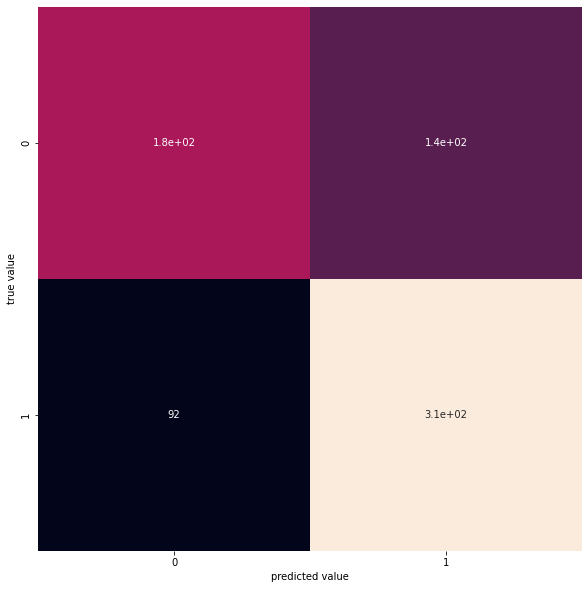

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.8) #dividir datos de entranamiento y evaluación
model.fit(Xtrain, ytrain) #entrenar modelo
y_model = model.predict(Xtest) #predicción

# matriz de confusión
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(ytest, y_model)
tn, fp, fn, tp = mat.ravel() #Se obtienen estos datos para calcular la métrica specificity
sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('predicted value')
plt.ylabel('true value');

**Se obtienen las métricas:**
accuracy, precision, recall, specificity y f1-score

In [ ]:
print('ACCURACY:',accuracy_score(ytest, y_model))
print('PRECISION:',precision_score(ytest, y_model))
print('RECALL:',recall_score(ytest, y_model))
specificity = tn / (tn+fp) # tasa de verdaderos negativos
print('SPECIFICITY:',specificity)
print('F1-SCORE:',f1_score(ytest, y_model))

ACCURACY: 0.6789115646258503
PRECISION: 0.6855895196506551
RECALL: 0.7733990147783252
SPECIFICITY: 0.5623100303951368
F1-SCORE: 0.7268518518518519


Cuando al modelo se le aumenta el porcentaje de entrenamiento a 80%, se observa un leve incremento en el resultado de algunas métricas, pero disminuye otra como la especificidad, por lo que para el modelo de DecisionTreeClassifier, no da da mejores resultados el aumentar el porcentaje de datos para el entrenamiento para este dataset.

## **6. Comparaciones entre modelos**

### **6.1 Resultado de las métricas para cada modelo**

In [ ]:
Models=pd.DataFrame({'Models':['GaussianNB','DecisionTreeClassifier','KNeighborsClassifier'],
                    'Accuracy':[accuracy70_GaussianNB,accuracy70_DecisionTreeClassifier,accuracy70_KNeighborsClassifier],
                    'Recall':[recall70_GaussianNB,recall70_DecisionTreeClassifier,recall70_KNeighborsClassifier],
                    'Specificity':[specificity70_GaussianNB,specificity70_DecisionTreeClassifier,specificity70_KNeighborsClassifier],
                    'F1_score':[f1_score70_GaussianNB,f1_score70_DecisionTreeClassifier,f1_score70_KNeighborsClassifier]
                    })
Models

,Models,Accuracy,Recall,Specificity,F1_score
0,GaussianNB,0.830482,0.846995,0.808664,0.850480
1,DecisionTreeClassifier,0.769829,0.756831,0.787004,0.789174
2,KNeighborsClassifier,0.678072,0.718579,0.624549,0.717599


### **6.2 Gráficas comparativas para cada modelo**

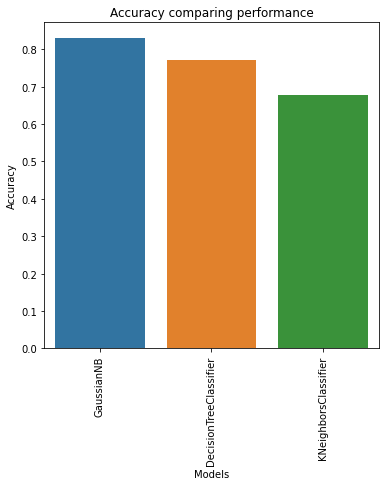

In [ ]:
fig=plt.figure(figsize=(6,6))
sns.barplot(x=Models.Models,y=Models.Accuracy)
plt.xticks(rotation=90)
plt.title("Accuracy comparing performance")
fig.show()

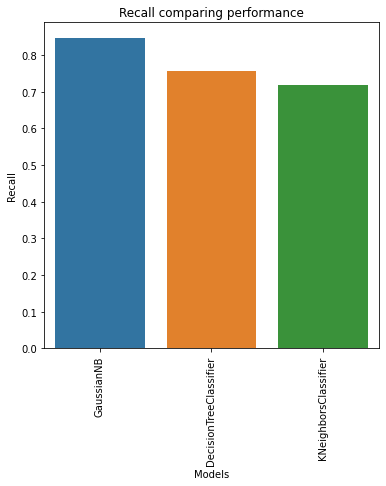

In [ ]:
fig=plt.figure(figsize=(6,6))
sns.barplot(x=Models.Models,y=Models.Recall)
plt.xticks(rotation=90)
plt.title("Recall comparing performance")
fig.show()

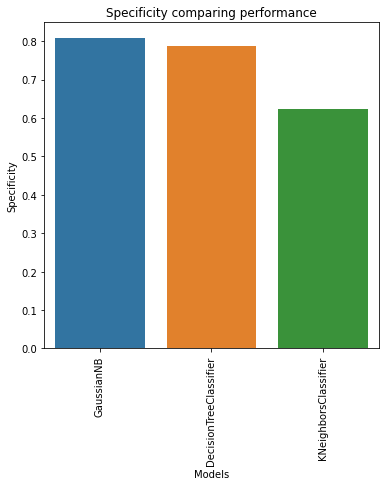

In [ ]:
fig=plt.figure(figsize=(6,6))
sns.barplot(x=Models.Models,y=Models.Specificity)
plt.xticks(rotation=90)
plt.title("Specificity comparing performance")
fig.show()

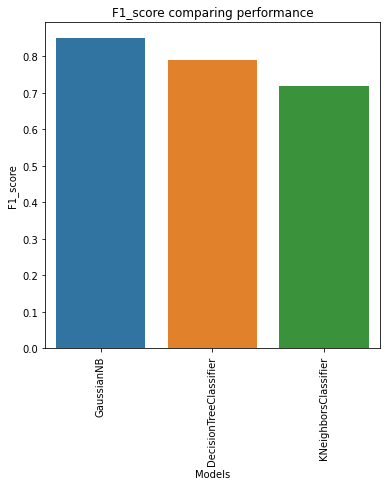

In [ ]:
fig=plt.figure(figsize=(6,6))
sns.barplot(x=Models.Models,y=Models.F1_score)
plt.xticks(rotation=90)
plt.title("F1_score comparing performance")
fig.show()

Se visualizan las medidas de desempeño para los 3 modelos de aprendizaje automático entrenados previamente, al comparar los modelos se encuentra que de manera general, para este dataset el algoritmo que arroja los mejores resultados es GaussianNB, para este entorno de datos balanceados, recall y f1-score son los que mejores resultados ha dado, siendo recall la métrica de mayor importancia entre las dos. El algoritmo que peor desempeño ha obtenido de acuerdo a las métricas calculadas, es KNeighborsClassifier, dando resultados por debajo de un rango aceptable en las predicciones.

## **7. Conclusiones:**

- Dado el contexto de los datos, se le da mayor importancia a los modelos de predicción en sus metricas de Recall y Accuracy, esto debido a que evitar los Falsos negativos es lo más critico debido a que sería muy grave pronosticar pacientes como sanos si en realidad estos se encuentran enfermos del corazón. Por lo tanto se considera como de mayor calidad aquellos modelos en los que estas dos metricas son superiores.

- El dataset esta balanceado por lo que la metrica de f1-score no cobra mayor impotancia de las metricas mencionadas en la anterior conclusión. Sin embargo esta metrica, junto a especificidad y precisión, dan una idea de que tanto aumenta o disminuye la calidad de los modelos para predecir clases negativas o positivas del vector objetivo.

- A la hora de elegir si es mejor destinar mas datos para el entrenamiento de los modelos, se considera que lo mejor es destinar al menos un 30% de los datos para la evaluación para así evitar sesgos en los resultados de las metricas. Esto debido a que los datos con los que se trabajan no son muchos (alrededor de 900) y lo mejor sería obtener mas datos que compensen en porcentaje de evaluación antes de destinar mas datos para el entrenamiento.

- El desempeño de los algoritmos implementados es deficiente en todos los casos, lo que sugiere que el dataset seleccionado contiene una cantidad de datos insuficientes para realizar predicciones confiables, imposible de mejorar aún aumentando el porcentaje de datos para el entrenamiento del algoritmo,  debido a que al entrenar con más datos, se reduce considerablemente el número de datos para realizar la respectiva evaluación
 
- Si se comparan los resultados de las métricas para los algoritmos implementados, se tiene que el que mejor desempeño tuvo, fue GaussianNB, y el que peor desempeño tuvo fue KNeighborsClassifier. La medida de desempeño que fue inferior en todos los modelos fue la especificidad, indicando así que algunas características tienen valores parecidos tanto para una persona sana como en una persona con enfermedad cardiaca.
